#### **1. Import Data and Analyze Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# pandas=[]
# with open('data.csv','r', newline= "") as x :
#     reader = csv.DictReader(x)
#     for i in reader:
#         pandas.append(dict(i))

In [3]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})
df.replace({'':np.NaN},inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##### **1.1 Cleaning Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
dfInfo = pd.DataFrame({
    'columnType' : [col for col in df.dtypes],
    'nullValues (nb)' : [null for null in df.isnull().sum()],
    'nullValues (%)' : [null for null in (df.isnull().sum()/df.shape[0])*100]
}).T.rename(columns={key:val for key,val in enumerate(df.columns)})
dfInfo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
columnType,object,object,object,int64,datetime64[ns],float64,object,object
nullValues (nb),0,0,1454,0,0,0,135080,0
nullValues (%),0,0,0.268311,0,0,0,24.9267,0


Karena missing value tersebut hanya terdapat dalam fitur **CustomerID** dan **Description**  dan kita akan mengklasifikasi bagian tersebut maka kita tidak bisa mengganti missing value tersebut, jadi kita harus menghapus missing value tersebut.

In [7]:
df = df.dropna(axis=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
dfInfo = pd.DataFrame({
    'columnType' : [col for col in df.dtypes],
    'nullValues (nb)' : [null for null in df.isnull().sum()],
    'nullValues (%)' : [null for null in (df.isnull().sum()/df.shape[0])*100]
}).T.rename(columns={key:val for key,val in enumerate(df.columns)})
dfInfo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
columnType,object,object,object,int64,datetime64[ns],float64,object,object
nullValues (nb),0,0,0,0,0,0,0,0
nullValues (%),0,0,0,0,0,0,0,0


Setelah tidak terdapat missing values, kita juga harus mengecek duplikat data di dalam dataset, dan akan menghapus jika terdapat duplikat.

In [9]:
df[df.duplicated()==True]
df.duplicated().sum()

5225

In [10]:
df = df.drop_duplicates()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##### **1.2 Explonatory Analysis**

##### 1.2.1 Countries

In [11]:
print('Daftar negara yang membuat transaksi :',df.nunique()['Country'])

Daftar negara yang membuat transaksi : 37


In [12]:
a = 0
listTotal = []
listCountry = []
listPct = []
for i,item in enumerate(df['Country'].unique()):
    listTotal.append(df[(df['Country']== item ) & True].shape[0])
    a = a + df[(df['Country']== item ) & True].shape[0]
    listCountry.append(item)
    listPct.append(round((listTotal[i]/df.shape[0])*100,2))


print('Jumlah Negara yang bertransaksi : Total Transaksi {}'.format(a))

country = pd.DataFrame({'Negara' : df['Country'].unique(),'Total Customer' : listTotal,'Percentage' : listPct})
country.head()

Jumlah Negara yang bertransaksi : Total Transaksi 401604


,Negara,Total Customer,Percentage
0,United Kingdom,356728,88.83
1,France,8475,2.11
2,Australia,1258,0.31
3,Netherlands,2371,0.59
4,Germany,9480,2.36


##### 1.2.2 Customers and Product

In [13]:
Table = pd.DataFrame({
    'products' : [df['StockCode'].nunique()],
    'transaction' : [df['InvoiceNo'].nunique()],
    'customers' : [df['CustomerID'].nunique()]
}).rename(index={0:'quantity'})
Table

,products,transaction,customers
quantity,3684,22190,4372


Dapat dilihat bahwa 4372 pengguna dan 3684 produk berbeda. Jumlah total transaksi lebih dari 22.000.
Sekarang kita akan menentukan jumlah produk yang dibeli dalam setiap transaksi:

In [14]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
temp = temp.rename(columns={'InvoiceDate':'Number of Product'})
temp.head()

,CustomerID,InvoiceNo,Number of Product
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


Baris pertama dari daftar ini menunjukkan beberapa hal yang menarik:
<li>Tedapat data di dalam column InvoiceNo dengan awalan C: ini menunjukkan transaksi yang telah dibatalkan</li>
<li>Terdapat transaksi yang hanya sekaliseumur hidup (mis. 12346)</li>
<li>Terdapat sejumlah besar item di setiap pesanan</li>

##### 1.2.3 Cancelation Order

Karena order yang di cancel terdapat di Customer dengan urutan pertama bila di sort, maka kita akan melihat bentuk data di dalam dataframe untuk membaca data cancel tersebut. Tetapi sebelumnya kita lihat berapa persen pesanan yang di cancel terlebih dahulu.

In [15]:
temp['order canceled'] = temp['InvoiceNo'].apply(lambda x: int('C' in x))
display(temp.head())
print('Jumlah order yang di cancel :',(temp['order canceled'].sum()/temp['order canceled'].shape[0]*100),'%')

,CustomerID,InvoiceNo,Number of Product,order canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


Jumlah order yang di cancel : 16.466876971608833 %


In [16]:
df.sort_values('CustomerID').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland


Berdasarkan dataframe diatas, kami melihat bahwa ketika pesanan dibatalkan terdapat atau tercatat sebagai transaksi lain (dilihat dari column Quantity: 74215 dan -74215) karena sebagian besar identik kecuali untuk variabel Quantity dan InvoiceNo. 
Saya memutuskan untuk memeriksa apakah terdapat treansaksi lain yang sepert ini. Jadi,saya mencoba untuk menemukan data yang menunjukkan Quantity yang negatif dan memeriksa apakah ada pesanan yang mirip seperti contoh diatas, yaitu semua identi kecuali variable Quantity(positif) dan InvoiceNo. --> (terdapat counterpart)

In [17]:
df_check = df[df['Quantity'] < 0][['InvoiceNo','CustomerID','Quantity','StockCode','Description','UnitPrice']]
for item in df_check.index:
    if df[(df['CustomerID'] == df_check.loc[item,'CustomerID']) & (df['Quantity'] == -int(df_check.loc[item,'Quantity'])) & (df['Description'] == df_check.loc[item,'Description'])].shape[0] == 0: 
        print(df_check.loc[item])
        break

InvoiceNo       C536379
CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


In [18]:
df[df['CustomerID']== '14527'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


Kenyataannya tidak semua Quantity yang negatif tersebut terdapat pesanan yang mirip, salah satu contoh diatas terdapat **Description** Discount dan tidak terdapat pesanan yang mirip seperti contoh diatas, yaitu semua identi kecuali variable Quantity(positif) dan InvoiceNo.Saya merasa bahwa hipotesis awal tidak terpenuhi karena adanya description 'Discount'. Saya memeriksa kembali hipotesisnya tetapi kali ini mengabaikan Description 'Discount':

In [19]:
df_check2 = df[(df['Quantity'] < 0)&(df['Description']!='Discount')][['InvoiceNo','CustomerID','Quantity','StockCode','Description','UnitPrice']]
for item in df_check.index :
    if df[(df['CustomerID'] == df_check.loc[item,'CustomerID']) & (df['Quantity'] == -int(df_check.loc[item,'Quantity'])) & (df['Description'] == df_check.loc[item,'Description'])].shape[0] == 0:
        print(df_check.loc[item])
        break

InvoiceNo       C536379
CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


In [20]:
df[(df['CustomerID']=='15311')&(df['Description']=='SET OF 3 COLOURED  FLYING DUCKS')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom


Sekali lagi, saya menemukan bahwa hipotesis awal salah. Karenanya, pembatalan tidak harus sesuai dengan pesanan yang seharusnya dilakukan sebelumnya.
Kemudian, saya memutuskan untuk membuat list yang memishkan bagian mana yang cancel dengan terdapat counterpart dan yang tidak terdapat counterpart. Di bawah ini, saya membuat sensus dari pesanan yang dibatalkan dan membedakan mana yang terdapat **counterpart** dan yang **nocounterpart**:

In [21]:
dfCleaned = df.copy()
df['Quantity'] = df['Quantity'].astype('int64')
dfCleaned['QuantityCanceled'] = 0
dfCleaned.head()

counterpart = []
nocounterpart = []
for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) & 
                         (df['InvoiceDate'] < col['InvoiceDate']) & 
                         (df['Quantity']   > 0)].copy()
    if (df_test.shape[0] == 0):
        nocounterpart.append(index)
    #________________________________
    # Cancel dengan counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        dfCleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        counterpart.append(index)
    #______________________________________________________________
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if int(val['Quantity']) < -col['Quantity']: continue
            dfCleaned.loc[index, 'QuantityCanceled'] = -col['Quantity']
            counterpart.append(index) 
            break

In [22]:
print("counterpart: {}".format(len(counterpart)))
print("nocounterpart: {}".format(len(nocounterpart)))

counterpart: 7521
nocounterpart: 1226


Kemudian, saya memutuskan untuk menghapus semua entri ini, yang masing-masing terhitung sekitar 1,4% dan 0,2% dari dataframe.
Sekarang saya memeriksa jumlah entri yang terkait dengan pembatalan dan yang belum dihapus dengan filter sebelumnya:

In [23]:
dfCleaned.drop(counterpart, axis = 0, inplace = True)
dfCleaned.drop(nocounterpart, axis = 0, inplace = True)
remainingEntries = dfCleaned[(dfCleaned['Quantity'] < 0) & (dfCleaned['StockCode'] != 'D')]
print("data yang belum di delete: {}".format(remainingEntries.shape[0]))
remainingEntries[:5]

data yang belum di delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754,United Kingdom,0


In [24]:
dfCleaned.drop(remainingEntries.index, axis = 0, inplace = True)

In [25]:
#Menyimpan file yang telah di cleaning
dfCleaned.to_csv('dfCleaned.csv')

In [26]:
dfCleaned = pd.read_csv('dfCleaned.csv', index_col = False)
dfCleaned = dfCleaned.drop('Unnamed: 0',axis='columns')
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0


##### 1.2.4 StockCode

Di atas, telah terlihat bahwa beberapa nilai variabel StockCode menunjukkan transaksi tertentu (mis. D untuk Diskon). Saya memeriksa konten variabel ini dengan mencari sekumpulan kode yang hanya akan berisi huruf:

(Disini saya memakai regex(regular expression) untuk menemukan StockCode yang hanya berisi huruf, karena mayoritas StockCode berisi angka dan huruf, seperti contoh diatas)

In [27]:
listSpecialCode = dfCleaned[dfCleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
listSpecialCode

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

In [28]:
for code in listSpecialCode:
    print("{:<15} -> {:<30}".format(code, dfCleaned[dfCleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


StockCode diatas tidak bisa menjadi ciri pelanggan kami, jadi kita akan membuang transaksi tersebut dari basis data kami.

In [29]:
for i in listSpecialCode:
    dfCleaned = dfCleaned.drop(dfCleaned[dfCleaned['StockCode']==i].index,axis=0)

##### 1.2.5 Outliers

In [30]:
dfCleaned.describe()

,Quantity,UnitPrice,CustomerID,QuantityCanceled
count,391183.000000,391183.000000,391183.000000,391183.000000
mean,13.179665,2.874130,15295.083503,0.526667
std,181.907403,4.284639,1710.359579,175.825115
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,0.000000
50%,6.000000,1.950000,15158.000000,0.000000
75%,12.000000,3.750000,16794.000000,0.000000
max,80995.000000,649.500000,18287.000000,80995.000000


Nilai min di UnitPrice adalah 0, coba kita periksa terlebih dahulu.

In [31]:
dfCleaned[dfCleaned['UnitPrice']==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
6746,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0
22103,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0
24901,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0
28591,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0
28593,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0


Saya tergoda untuk mengganti nilai nol dengan yang harga tiap barang dalam description tetapi mungkin terdapat diskon khusus atau sesuatu yang lain jadi saya akan membiarkannya begitu saja.

##### **1.3 Rekayasa Fitur**

##### 1.3.1 Total Price

In [32]:
def unique_counts(data):
   for i in dfCleaned.columns:
       count = dfCleaned[i].nunique()
       print(i, ": ", count)
unique_counts(dfCleaned)

InvoiceNo :  18405
StockCode :  3659
Description :  3871
Quantity :  300
InvoiceDate :  17169
UnitPrice :  356
CustomerID :  4335
Country :  37
QuantityCanceled :  83


In [33]:
dfCleaned['TotalPrice'] = dfCleaned['UnitPrice'] * (dfCleaned['Quantity'] - dfCleaned['QuantityCanceled'])
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34


Dengan adanya fitur baru yaitu TotalPrice maka kita sekarang dapat melihat nilai moneter negara-negara berkat fitur ini. Saya akan melihat menggunakan Bar Plot yang dengan Pandas Data Vizualitation

Text(0.5, 1.0, 'Revenue per Country')

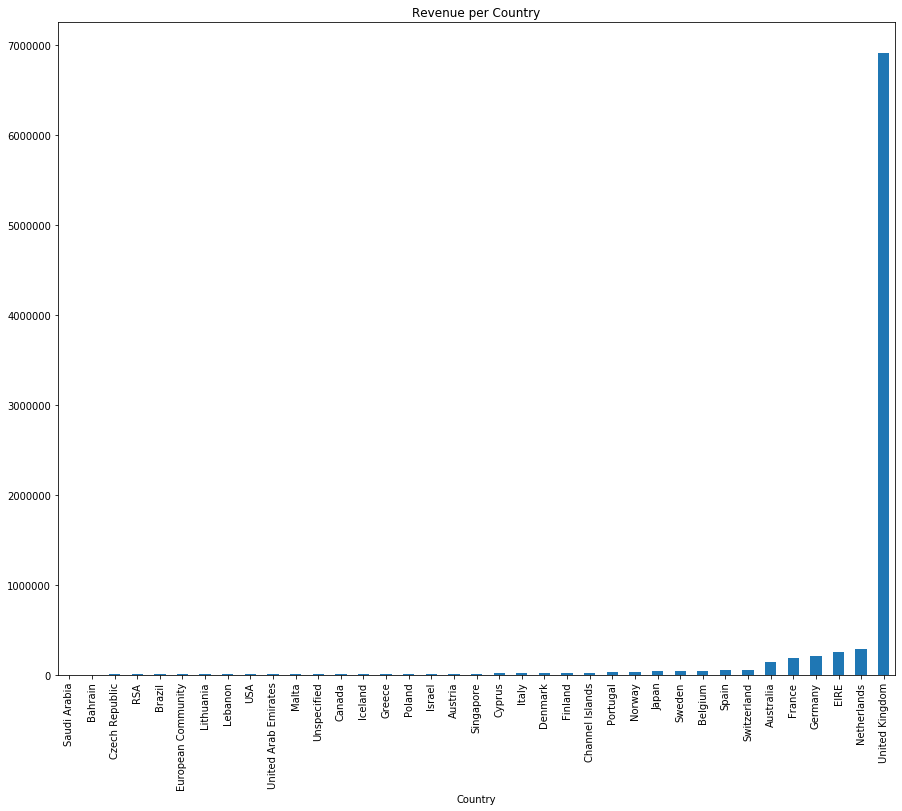

In [34]:
revenue_per_countries = dfCleaned.groupby(["Country"])["TotalPrice"].sum().sort_values()
revenue_per_countries.plot(kind='bar', figsize=(15,12))
plt.title("Revenue per Country")

Text(0.5, 1.0, 'Number of Invoices per Country')

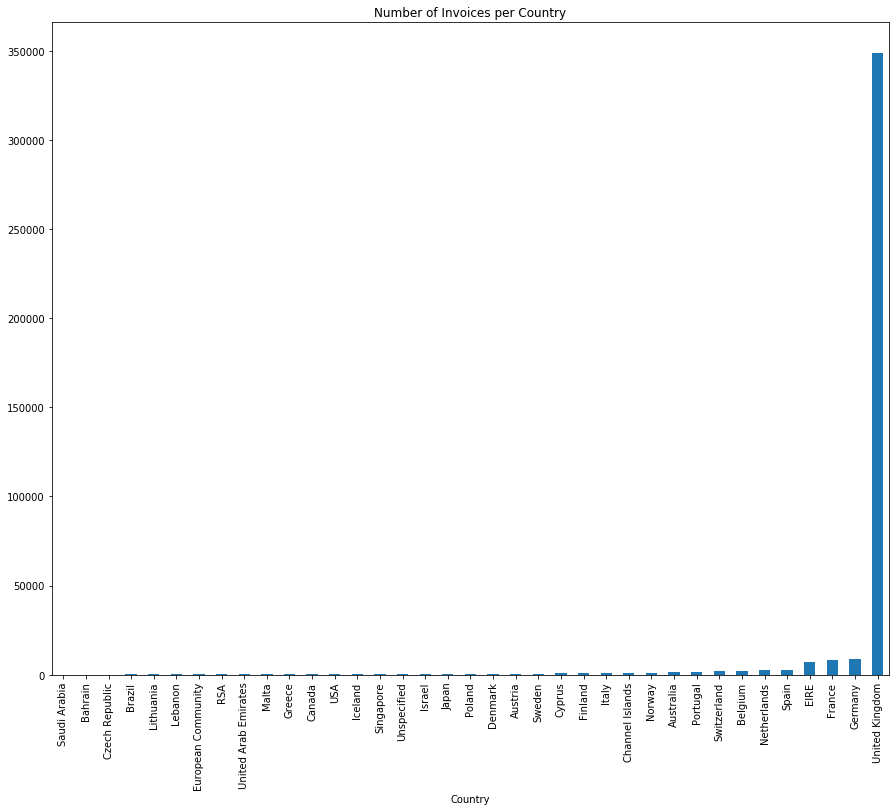

In [35]:
No_invoice_per_country = dfCleaned.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='bar', figsize=(15,12))
plt.title("Number of Invoices per Country")

Ini sangat menarik karena kita dapat melihat bahwa Belanda adalah negara ke-2 nilainya walaupun memiliki Invoice lebih sedikit daripada negara-negara seperti Jerman atau Perancis misalnya dan 10 kali lebih sedikit Customer. (95, 87 dan 9 untuk Jerman, Perancis, dan Belanda)

In [36]:
dfCleaned['InvoiceDate'] = pd.to_datetime(dfCleaned['InvoiceDate'])

In [37]:
#___________________________________________
# Jumlah pembelian dan jumlah pemesanan
temp = dfCleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basketPrice = temp.rename(columns = {'TotalPrice':'Basket Price'})
#_____________________
# Tanggal pemesanan
dfCleaned['InvoiceDate_int'] = dfCleaned['InvoiceDate'].astype('int64')
temp = dfCleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
dfCleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basketPrice.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basketPrice = basketPrice[basketPrice['Basket Price'] > 0]
basketPrice.sort_values('CustomerID').head()

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,2011-08-02 08:48:00.000000000


In [38]:
display(basketPrice[basketPrice['Basket Price'] == basketPrice['Basket Price'].min()])
display(dfCleaned[(dfCleaned['TotalPrice'] == 0.38)&(dfCleaned['InvoiceNo'] == '570554')])

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
7897,14800,570554,0.38,2011-10-11 11:02:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
279921,570554,84341B,SMALL PINK MAGIC CHRISTMAS TREE,1,2011-10-11 11:02:00,0.38,14800,United Kingdom,0,0.38


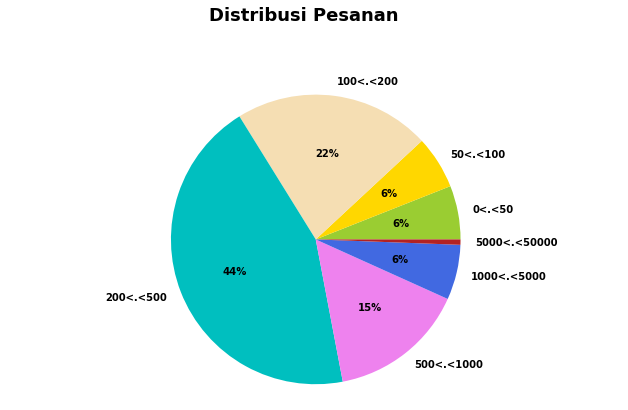

In [39]:
priceRange = [0, 50, 100, 200, 500, 1000, 5000, 50000]
countPrice = []
for i, price in enumerate(priceRange):
    if i == 0: continue
    val = basketPrice[(basketPrice['Basket Price'] < price) &
                       (basketPrice['Basket Price'] > priceRange[i-1])]['Basket Price'].count()
    countPrice.append(val)
#____________________________________________
# Merepresentasi jumlah pembelian   
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(priceRange[i-1], s) for i,s in enumerate(priceRange) if i != 0]
sizes  = countPrice
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribusi Pesanan", ha='center', fontsize = 18)
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dfCleaned['Country'])

LabelEncoder()

In [41]:
l = [i for i in range(dfCleaned['Country'].nunique())]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [42]:
dfCleaned['Country'] = le.transform(dfCleaned['Country'])

In [43]:
with open('labelencoder.pickle', 'wb') as g:
    pickle.dump(le, g)

In [44]:
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34


##### 1.3.2 RFM Principle

Saya akan menerapkan prinsip RFM di sini untuk mengklasifikasikan pelanggan dalam dataframe ini.
Bagian ini terinspirasi oleh karya Susan Li. RFM adalah kependekan dari Recency, Frekuensi dan Moneter.
Ini adalah teknik segmentasi pelanggan yang menggunakan perilaku pembelian masa lalu untuk membagi pelanggan menjadi beberapa kelompok.

In [45]:
print(dfCleaned['InvoiceDate'].min())
print(dfCleaned['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


 Saya akan menetapkan tanggal satu hari setelah tanggal terkhir terjadinya transaksi.


In [46]:
NOW = dt.datetime(2011,12,10)
dfCleaned['InvoiceDate'] = pd.to_datetime(dfCleaned['InvoiceDate'])

Terinspirasi oleh Miljan Stojiljkovic, saya menggunaan fungsi agg (aggreagtion) untuk memberikan fleksibilitas menerapkan banyak fungsi sekaligus , atau meneruskan daftar fungsi ke setiap kolom.

In [47]:
customAggregation = {}
customAggregation["InvoiceDate"] = lambda x:x.iloc[0]
customAggregation["CustomerID"] = lambda x:x.iloc[0]
customAggregation["TotalPrice"] = "sum"

rfmTable = dfCleaned.groupby("InvoiceNo").agg(customAggregation)
rfmTable.head()

,InvoiceDate,CustomerID,TotalPrice
InvoiceNo,,,
536365,2010-12-01 08:26:00,17850,139.12
536366,2010-12-01 08:28:00,17850,22.20
536367,2010-12-01 08:34:00,13047,278.73
536368,2010-12-01 08:34:00,13047,70.05
536369,2010-12-01 08:35:00,13047,17.85


In [48]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")
rfmTable.head()

,InvoiceDate,CustomerID,TotalPrice,Recency
InvoiceNo,,,,
536365,2010-12-01 08:26:00,17850,139.12,373.0
536366,2010-12-01 08:28:00,17850,22.20,373.0
536367,2010-12-01 08:34:00,13047,278.73,373.0
536368,2010-12-01 08:34:00,13047,70.05,373.0
536369,2010-12-01 08:35:00,13047,17.85,373.0


In [49]:
customAggregation = {}

customAggregation["Recency"] = ["min", "max"]
customAggregation["InvoiceDate"] = lambda x: len(x)
customAggregation["TotalPrice"] = "sum"

rfmTableFinal = rfmTable.groupby("CustomerID").agg(customAggregation)

In [50]:
rfmTableFinal.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]
rfmTableFinal.head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12346,325.0,325.0,1,0.00
12347,2.0,367.0,7,4310.00
12348,75.0,358.0,4,1437.24
12349,18.0,18.0,1,1457.55
12350,310.0,310.0,1,294.40


Dari data diatas maka :
    <ol>
    <li>**min_recency** adalah waktu terdekat customer melakukan transaksi</li>
    <li>**max_recency** adalah waktu terjauh customer melakukan transaksi</li>
    <li>**frequency** adalah berapa kali customer melakukan transaksi (1 hari terhitung 1 kali transaksi)</li>
    <li>**monetary** value adalah jumlah uang yang dikeluarkan untuk transaksi tersebut</li>

In [51]:
quantiles = rfmTableFinal.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [52]:
quantiles

{'min_recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'max_recency': {0.25: 112.0, 0.5: 248.0, 0.75: 326.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'monetary_value': {0.25: 298.15999999999997,
  0.5: 653.19,
  0.75: 1617.0549999999998}}

In [53]:
segmentedRFM = rfmTableFinal

In [54]:
segmentedRFM[segmentedRFM['min_recency'] <= quantiles['min_recency'] [0.25]].head()

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12347,2.0,367.0,7,4310.00
12358,1.0,150.0,2,928.06
12362,3.0,295.0,10,4667.53
12364,7.0,112.0,4,1208.10
12367,4.0,4.0,1,150.90


In [55]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [56]:
segmentedRFM['r_quartile'] = segmentedRFM['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmentedRFM['f_quartile'] = segmentedRFM['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmentedRFM['m_quartile'] = segmentedRFM['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmentedRFM.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4
12347,2.0,367.0,7,4310.00,1,1,1
12348,75.0,358.0,4,1437.24,3,2,2
12349,18.0,18.0,1,1457.55,2,4,2
12350,310.0,310.0,1,294.40,4,4,4


In [57]:
segmentedRFM['RFMScore'] = segmentedRFM['r_quartile'].astype('str')+segmentedRFM['f_quartile'].astype('str')+segmentedRFM['m_quartile'].astype('str')
segmentedRFM.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346,325.0,325.0,1,0.00,4,4,4,444
12347,2.0,367.0,7,4310.00,1,1,1,111
12348,75.0,358.0,4,1437.24,3,2,2,322
12349,18.0,18.0,1,1457.55,2,4,2,242
12350,310.0,310.0,1,294.40,4,4,4,444


In [58]:
segmentedRFM[segmentedRFM['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
14646,1.0,354.0,73,279138.02,1,1,1,111
18102,0.0,367.0,60,259657.30,1,1,1,111
17450,8.0,367.0,46,194390.79,1,1,1,111
14911,1.0,373.0,198,134408.73,1,1,1,111
14156,9.0,371.0,54,115835.53,1,1,1,111


<img src='../LatihanPython/Latihan/RFM category.png'/>

In [59]:
# def Segmented(x):
#     if x == '444' :
#         return 'Lost Cheap Customer'
#     elif x == '111':
#         return 'Best Customer'
#     elif x == '311':
#         return 'Almost Lost Customer'
#     elif x == '222':
#         return 'Normal Customer'
#     elif x == '411':
#         return 'Lost Customer'
#     elif x == '221' or x == '321' or x== '421' or x== '211' or x== '231' or x== '431' or x=='121' or x =='131':
#         return 'Potential Big Spender'
#     elif x == '212' or x =='322'or x =='122'or x =='423'or x =='123'or x =='223'or x =='323'or x =='324'or x =='224'or x =='124'or x =='422'or x =='424':
#         return 'Potential Customer'
#     else:
#         return 'Need More Treatment'

In [60]:
# segmentedRFM['Segmented'] = segmentedRFM['RFMScore'].apply(Segmented)

In [61]:
# segmentedRFM.to_csv('segmentedRFM.csv')

In [62]:
# dfRFM = pd.read_csv('segmentedRFM.csv')
# dfRFM = dfRFM.drop(['r_quartile','f_quartile','m_quartile','Segmented'],axis=1)
# dfRFM.head()

In [63]:
dfCleaned = pd.merge(dfCleaned,segmentedRFM, on='CustomerID')

In [64]:
dfCleaned = dfCleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,372.0,373.0,34,5391.21,411
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00,372.0,373.0,34,5391.21,411
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411


##### 1.3.3 Time Feature

In [65]:
dfCleaned['Month'] = dfCleaned["InvoiceDate"].map(lambda x: x.month)
dfCleaned['Weekday'] = dfCleaned["InvoiceDate"].map(lambda x: x.weekday())
dfCleaned['Day'] = dfCleaned["InvoiceDate"].map(lambda x: x.day)
dfCleaned['Hour'] = dfCleaned["InvoiceDate"].map(lambda x: x.hour)
dfCleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,0,15.30,372.0,373.0,34,5391.21,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,0,22.00,372.0,373.0,34,5391.21,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,35,0,20.34,372.0,373.0,34,5391.21,411,12,2,1,8


In [66]:
dfCleaned.to_csv('dfCleaned_2.csv')

In [67]:
dfCleaned['Month'].value_counts()

11    62949
10    48613
12    42536
9     39510
5     27962
6     26820
3     26752
8     26688
7     26476
4     22347
1     20899
2     19631
Name: Month, dtype: int64

##### 1.3.4 Product Categories

Kita lihat contoh product yang dijual di column **Description**

In [68]:
for i in dfCleaned['Description'].unique()[20:30]:
    print(i)

JUMBO SHOPPER VINTAGE RED PAISLEY
ASSORTED COLOUR BIRD ORNAMENT
POPPY'S PLAYHOUSE BEDROOM 
POPPY'S PLAYHOUSE KITCHEN
FELTCRAFT PRINCESS CHARLOTTE DOLL
IVORY KNITTED MUG COSY 
BOX OF 6 ASSORTED COLOUR TEASPOONS
BOX OF VINTAGE JIGSAW BLOCKS 
BOX OF VINTAGE ALPHABET BLOCKS
HOME BUILDING BLOCK WORD


Fungsi dibawah mengambil data dari dataframe dan menganalisa isi dari kolom Deskripsi dengan melakukan operasi berikut:
<ol>
    <li>ekstrak nama yang layak dan lazim yang muncul dalam deskripsi produk</li>
    <li>untuk setiap nama, saya mengekstrak kata dasar dan mengumpulkan kumpulan nama yang terkait dengan kata dasar tersebut</li>
    <li>menghapus kata-kata yang muncul lebih dari 30%</li>
<li>ketika beberapa kata terdaftar untuk root yang sama, saya menganggap bahwa kata kunci yang terkait dengan root ini adalah nama terpendek.
    Langkah pertama dari analisis adalah untuk mengambil daftar produk:</li>

In [69]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
product = dfCleaned['Description'].unique()
stemmer = nltk.stem.porter.PorterStemmer()

def stemFilter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stemFilter, min_df=0.00, max_df=0.3)
# kita hapus kata-kata jika itu muncul lebih dari 30 % dari corpus.
TF_IDF_matrix = CV.fit_transform(product)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (3871, 1694) of float64


In [70]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3871, 100) of float64


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [72]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)
print(score_tfidf)

[0.03682414396381545, 0.0882090380162239, 0.11885478141206335, 0.13411141115876915, 0.166092564048713, 0.17634734827506104, 0.18449673816779136, 0.19062333692923497, 0.1881901084908108, 0.19099620406435086, 0.19183156882853777, 0.18630455429979503, 0.18674199715619977, 0.1981860610691506, 0.18820661446380632]


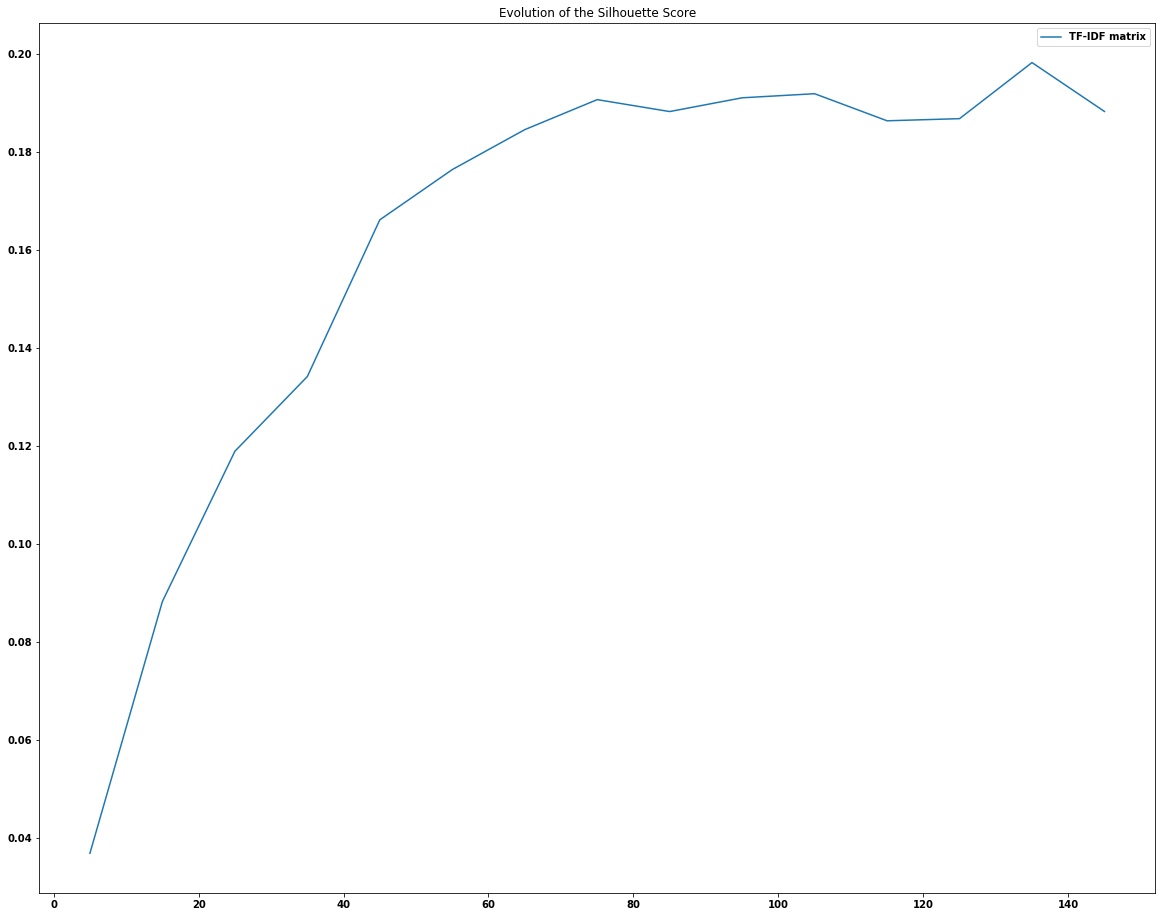

In [73]:
plt.figure(figsize=(20,16))

plt.subplot(1, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

Karena terlihat dari hasil silhouette score bahwa yang tertinggi berada di titik sekitar angka 135, maka saya akan menggunkan sekitar 135 cluster

Text(0.5, 1.0, 'Clustering Product with 135 clusters')

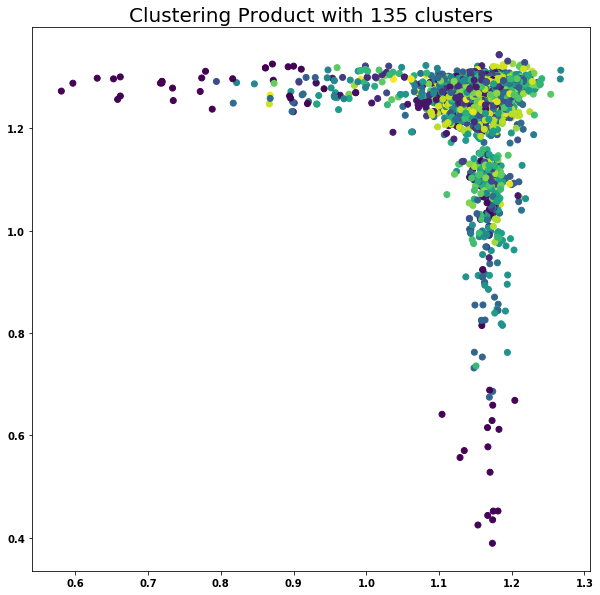

In [74]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Clustering Product with 135 clusters", fontsize="20")

[-26.085136    3.6777134  -3.7276924 ...  59.07795    60.19956
  59.307213 ]
[-30.326935 -58.370964 -14.250652 ... -29.34836  -29.46887  -28.961006]


Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

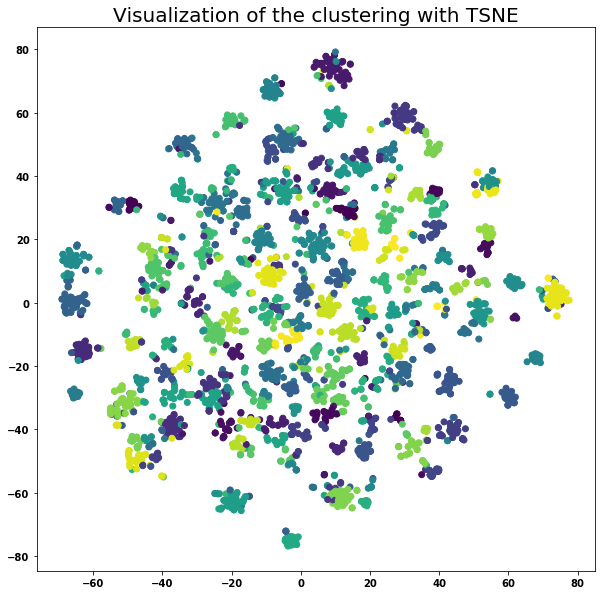

In [75]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)
print(proj[:,0])
print(proj[:,1])
print(clusters.shape)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

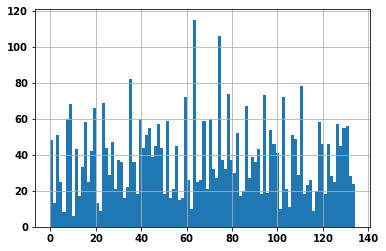

In [76]:
pd.Series(clusters).hist(bins=100)

<Figure size 432x288 with 0 Axes>

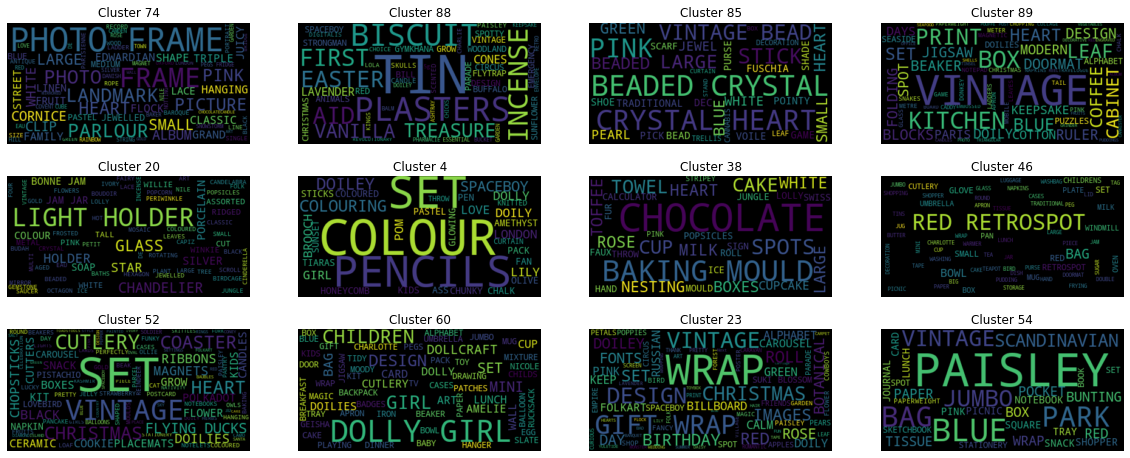

<Figure size 432x288 with 0 Axes>

In [77]:
import random
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(product[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

In [78]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(product, clusters)}
# print(dict_article_to_cluster)

In [79]:
with open('product_clusters.pickle', 'wb') as h:
    pickle.dump(dict_article_to_cluster, h)

#### **2. Mengkategorikan Customer**

##### **2.1 Pengelompokkan Dataset Berdasarkan Invoice**

In [80]:
cluster = dfCleaned['Description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(dfCleaned["TotalPrice"], 0)
df2 = pd.concat([dfCleaned['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()
df2_grouped.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,25.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
customAggregation = {}
customAggregation["TotalPrice"] = lambda x:x.iloc[0]
customAggregation["min_recency"] = lambda x:x.iloc[0]
customAggregation["max_recency"] = lambda x:x.iloc[0]
customAggregation["frequency"] = lambda x:x.iloc[0]
customAggregation["monetary_value"] = lambda x:x.iloc[0]
customAggregation["CustomerID"] = lambda x:x.iloc[0]
customAggregation["Quantity"] = "sum"
customAggregation["Country"] = lambda x:x.iloc[0]


df_grouped = dfCleaned.groupby("InvoiceNo").agg(customAggregation)

##### **2.2 Pengelompokkan Dataset Final Berdasarkan Invoice**

In [82]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

In [83]:
customAggregation = {}
customAggregation["TotalPrice"] = ['min','max','mean']
customAggregation["min_recency"] = lambda x:x.iloc[0]
customAggregation["max_recency"] = lambda x:x.iloc[0]
customAggregation["frequency"] = lambda x:x.iloc[0]
customAggregation["monetary_value"] = lambda x:x.iloc[0]
customAggregation["Quantity"] = "sum"
customAggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(customAggregation)
df_grouped_final.columns = ["min", "max", "mean", "min_recency", "max_recency", "frequency", "monetary_value", "quantity", "country"]
df_grouped_final.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country
CustomerID,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24


In [84]:
df2_grouped_final.head(5)

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
12347,0.0,0.003884,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.089722,...,0.010970,0.0,0.0,0.009234,0.0,0.0,0.042877,0.057912,0.0,0.0
12348,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.204559,0.403551,0.0,0.0
12349,0.0,0.049604,0.011897,0.0,0.0,0.0,0.0,0.012144,0.0,0.000000,...,0.025625,0.0,0.0,0.040465,0.0,0.0,0.027196,0.013584,0.0,0.0
12350,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


##### **2.3 Clustering Customer**

Sebelumnya saya men-standarisasikan data yang ada di dataset saya

In [85]:
from sklearn.preprocessing import StandardScaler
X3 = df_grouped_final.copy()
x3 = X3.as_matrix()
scaler = StandardScaler()
standard = scaler.fit(x3)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump(standard, f)

In [87]:
X1 = df_grouped_final.as_matrix()
X2 = df2_grouped_final.as_matrix()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


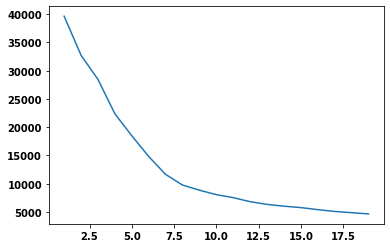

In [88]:
sse = []
for i in range(1,20):
    model = KMeans(n_clusters=i)
    model.fit(X_final_std_scale)
    sse.append(model.inertia_)

plt.plot(np.arange(1,20),sse)
plt.show()

In [89]:
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

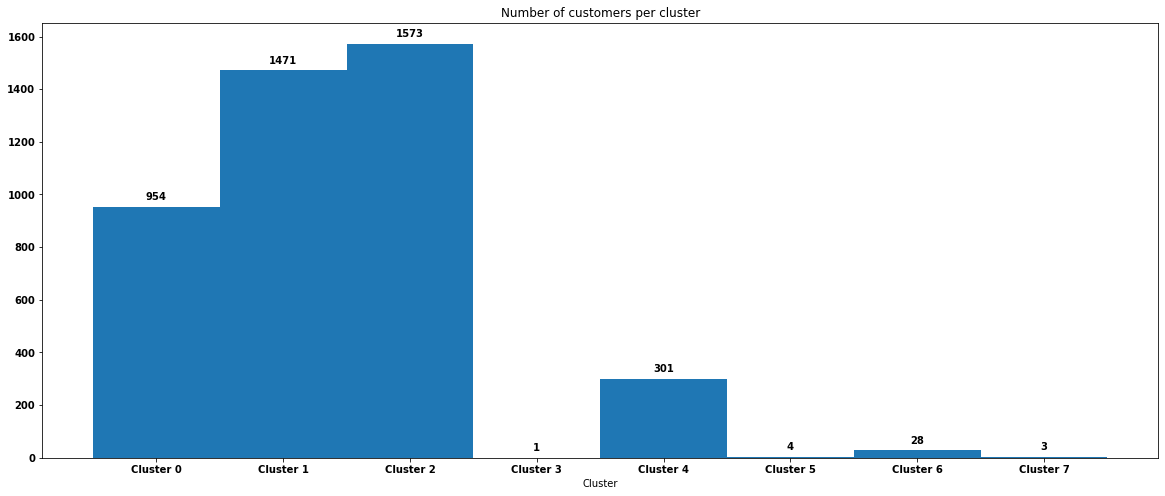

In [90]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [91]:
df_grouped_final["cluster"] = clusters

In [92]:
final_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
final_dataset.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,6,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,4,...,0.010970,0.0,0.0,0.009234,0.0,0.0,0.042877,0.057912,0.0,0.0
12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,4,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.204559,0.403551,0.0,0.0
12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,4,...,0.025625,0.0,0.0,0.040465,0.0,0.0,0.027196,0.013584,0.0,0.0
12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [93]:
final_dataset_V2 = final_dataset.reset_index()

In [94]:
final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

In [95]:
# with open('df_cleaned.pickle', 'wb') as f:
#     pickle.dump(df_cleaned, f)

##### **2.4 Interpretasi Cluster**

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

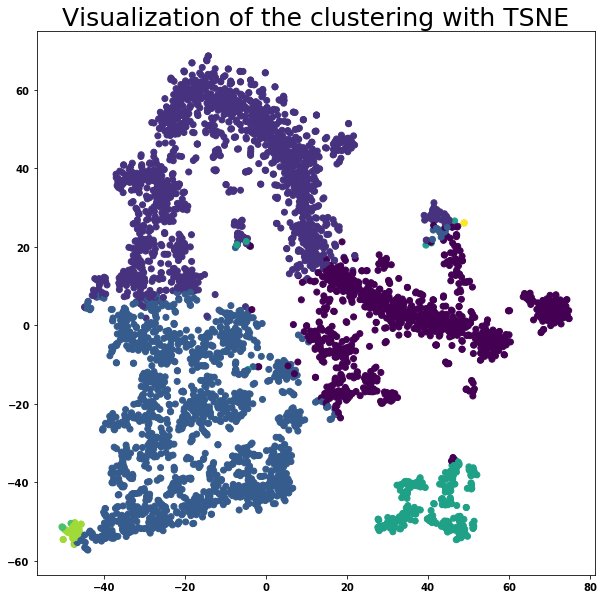

In [96]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")

Secara grafis cluster cukup khas. Mari kita lihat lebih dekat cluster yang berisi beberapa pelanggan.

##### 2.3.1 Clustering Customer

In [97]:
final_dataset.to_csv("final_dataset.csv")

In [189]:
final_dataset[final_dataset['cluster']==0].head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12350,25.2,25.20,25.20,310.0,310.0,1,294.40,196,24,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
12354,20.8,20.80,20.80,232.0,232.0,1,1079.40,530,30,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
12377,19.8,37.20,28.50,315.0,354.0,2,1548.12,942,32,0,...,0.000000,0.0,0.0,0.029068,0.0,0.0,0.009689,0.0,0.000000,0.000000
12410,17.0,17.00,17.00,308.0,308.0,2,521.08,207,32,0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
12510,33.0,162.72,97.86,142.0,325.0,2,814.57,347,30,0,...,0.040512,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.025044,0.036829


In [182]:
final_dataset[final_dataset['cluster']==0].mean()

min             29.051195
max             47.007673
mean            37.902343
min_recency    251.126834
max_recency    281.880503
                  ...    
Cluster_130      0.006109
Cluster_131      0.015609
Cluster_132      0.025647
Cluster_133      0.003243
Cluster_134      0.007443
Length: 145, dtype: float64

In [100]:
temp_final_df = final_dataset.reset_index()

In [101]:
temp_final_df['cluster'].unique()

array([6, 4, 0, 2, 1, 7, 5, 3], dtype=int64)

In [151]:
cust0 = list(temp_final_df[temp_final_df['cluster']==0]['CustomerID'])
print(cust0)

[12350, 12354, 12377, 12410, 12510, 12515, 12547, 12548, 12551, 12565, 12639, 12725, 12733, 12764, 12785, 12790, 12791, 12792, 12793, 12797, 12809, 12811, 12815, 12821, 12829, 12831, 12834, 12837, 12840, 12845, 12852, 12855, 12857, 12868, 12872, 12873, 12875, 12878, 12881, 12888, 12891, 12897, 12902, 12908, 12915, 12929, 12945, 12956, 12967, 12974, 12976, 12982, 12988, 12999, 13002, 13005, 13008, 13011, 13033, 13037, 13043, 13044, 13052, 13059, 13060, 13062, 13065, 13070, 13072, 13080, 13085, 13093, 13101, 13108, 13120, 13121, 13132, 13133, 13144, 13151, 13161, 13166, 13185, 13187, 13216, 13221, 13223, 13226, 13227, 13229, 13235, 13239, 13243, 13253, 13261, 13262, 13270, 13284, 13294, 13295, 13299, 13300, 13304, 13328, 13339, 13341, 13343, 13345, 13357, 13358, 13368, 13369, 13370, 13382, 13385, 13391, 13395, 13398, 13405, 13439, 13452, 13453, 13462, 13466, 13474, 13475, 13476, 13479, 13482, 13484, 13485, 13492, 13493, 13494, 13497, 13501, 13506, 13508, 13512, 13531, 13533, 13551, 13561

In [188]:
cluster0 = dfCleaned[dfCleaned['CustomerID'].isin(cust0)]
# cluster0
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean()

Quantity              9.385907
UnitPrice             3.357936
QuantityCanceled      0.416778
TotalPrice           16.577076
frequency             2.600488
min_recency         238.117902
monetary_value      850.073436
dtype: float64

In [105]:
cluster0['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    223
REGENCY CAKESTAND 3 TIER              185
PARTY BUNTING                         140
ASSORTED COLOUR BIRD ORNAMENT         123
REX CASH+CARRY JUMBO SHOPPER          102
JAM MAKING SET WITH JARS              102
SET OF 3 CAKE TINS PANTRY DESIGN      101
NATURAL SLATE HEART CHALKBOARD        101
HEART OF WICKER SMALL                  95
HOMEMADE JAM SCENTED CANDLES           84
Name: Description, dtype: int64

In [106]:
customAggregation = {}
customAggregation["Country"] = lambda x:x.iloc[0]
customAggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(customAggregation)

In [107]:
cluster0_grouped['RFMScore'].value_counts()

444    397
443    186
433     95
434     56
432     53
422     43
423     33
442     32
424     12
421     12
411      7
431      5
412      5
322      4
441      4
332      4
333      1
323      1
413      1
414      1
321      1
334      1
Name: RFMScore, dtype: int64

In [108]:
cluster0_grouped['Country'].value_counts()

35    925
26      6
32      5
30      5
23      2
18      2
36      1
34      1
33      1
31      1
28      1
25      1
24      1
21      1
20      1
Name: Country, dtype: int64

In [109]:
cluster0['Month'].value_counts()

12    5199
3     4279
5     3702
4     3565
2     3273
1     3135
6     3054
7      837
8        4
Name: Month, dtype: int64

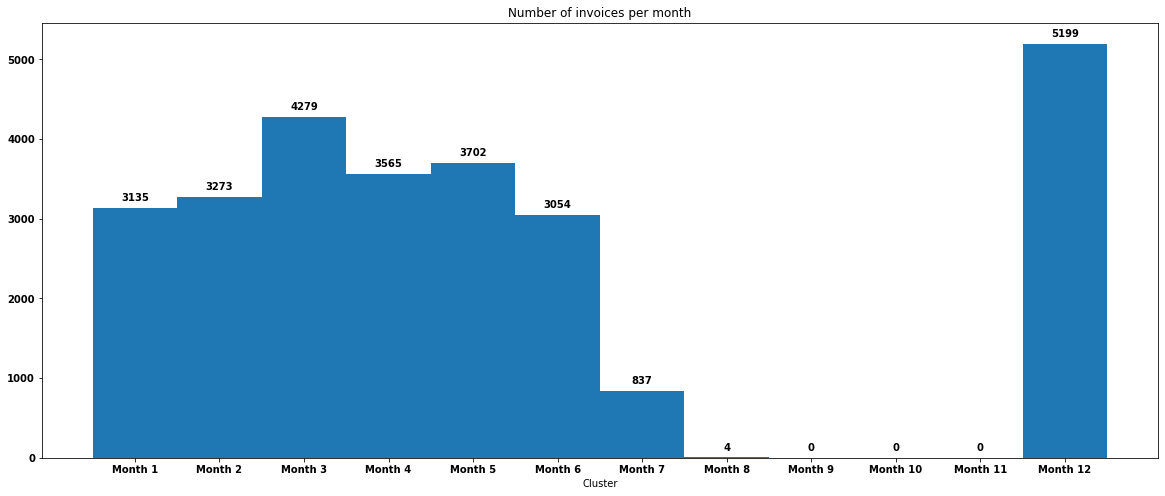

In [110]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])
for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

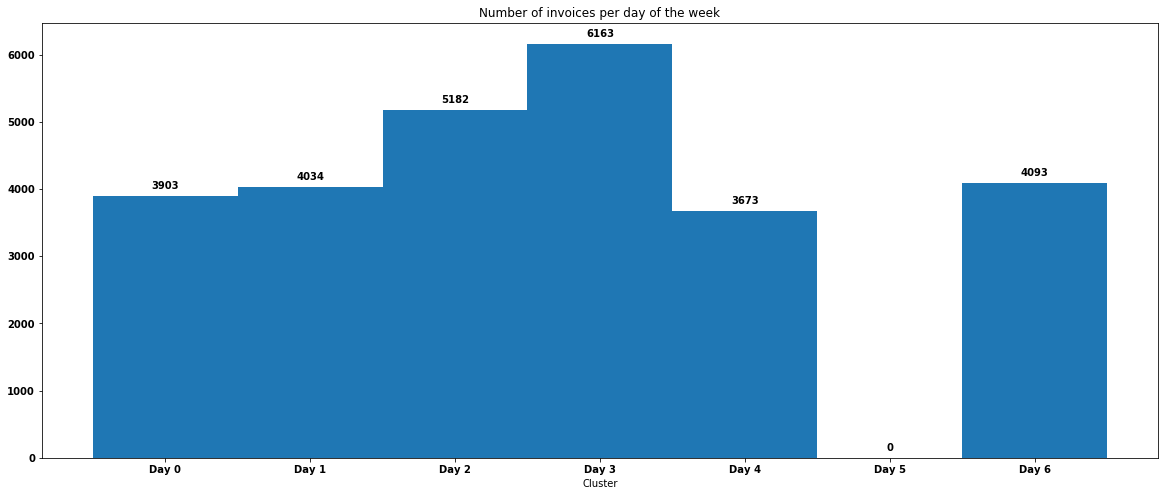

In [111]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Weekday'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

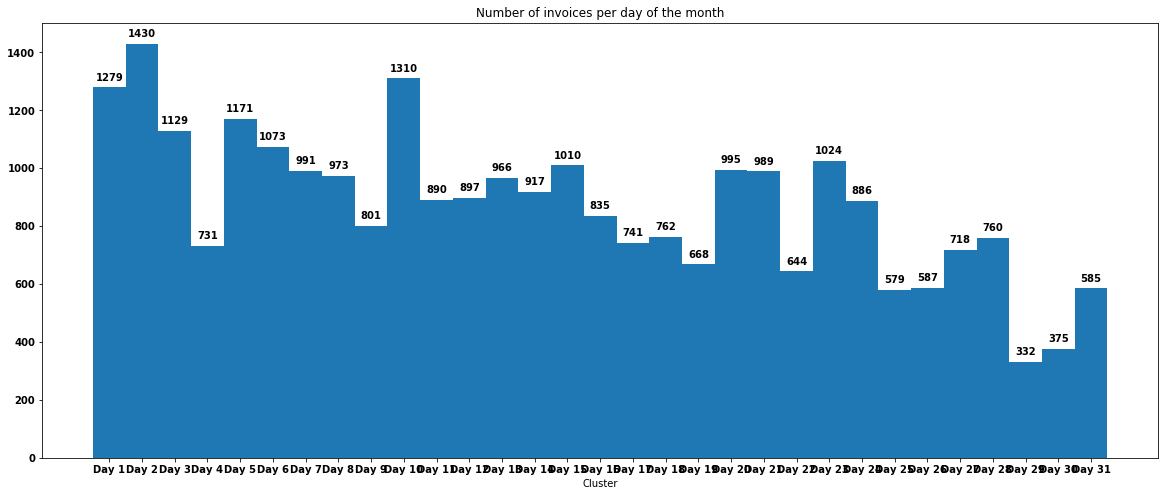

In [112]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Day'], bins=31)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(1,32)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

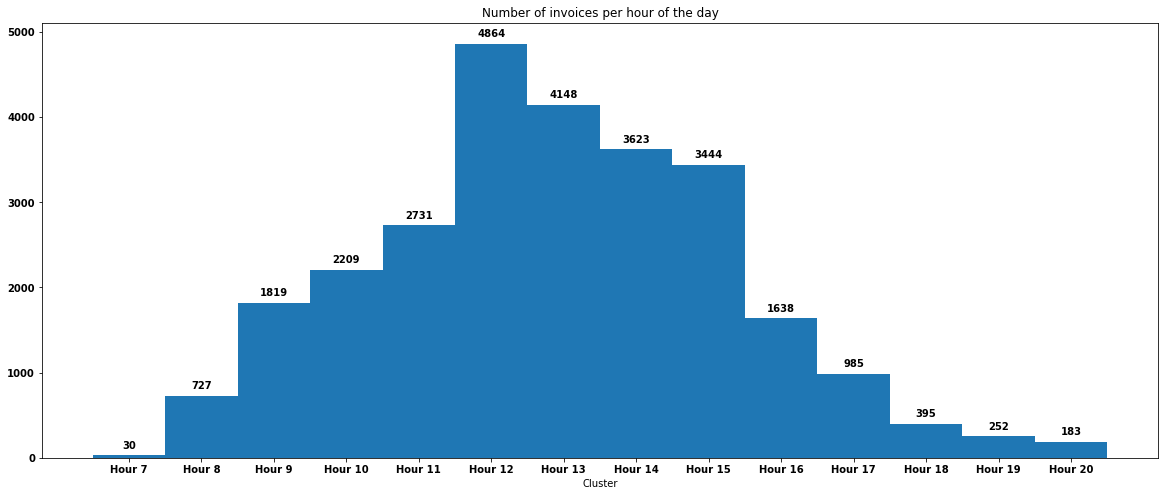

In [113]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Hour'], bins=14)
plt.xlabel("Cluster")
plt.title("Number of invoices per hour of the day")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Hour {}".format(x) for x in (sorted(cluster0['Hour'].unique()))])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

Pilih Cluster 2


rata rata tiap kolom :
min                 12.282568
max                 83.208442
mean                35.930377
min_recency         36.929434
frequency            7.013350
monetary_value    2655.909396
quantity          1566.851875
dtype: float64
-----------------------------------------------------


Quantity              10.660285
UnitPrice              2.868669
QuantityCanceled       0.096942
TotalPrice            18.069833
frequency             11.085061
min_recency           25.146864
monetary_value      4529.049410
dtype: float64

-----------------------------------------------------
 isi data dari column :
WHITE HANGING HEART T-LIGHT HOLDER    1366
JUMBO BAG RED RETROSPOT               1098
REGENCY CAKESTAND 3 TIER               985
PARTY BUNTING                          944
ASSORTED COLOUR BIRD ORNAMENT          937
LUNCH BAG RED RETROSPOT                904
LUNCH BAG  BLACK SKULL.                767
SET OF 3 CAKE TINS PANTRY DESIGN       723
LUNCH BAG PINK POLKADOT                679
LUNCH BAG CARS BLUE                    677
Name: Description, dtype: int64
----------------------------------------------------
jumlah nilai RFM per Score :
111    368
211    154
322    122
222    119
122     99
321     83
221     69
311     64
112     49
121     47
323     45
223     43
212     43
332     38
333     37
233     30
312     22
123     21
232     20
133     20
334     19
234     15
132      7
134      6
231      5
411      4
324      4
113      3
224      3
213      2
412      2
331      2
124      2
422      2
424 

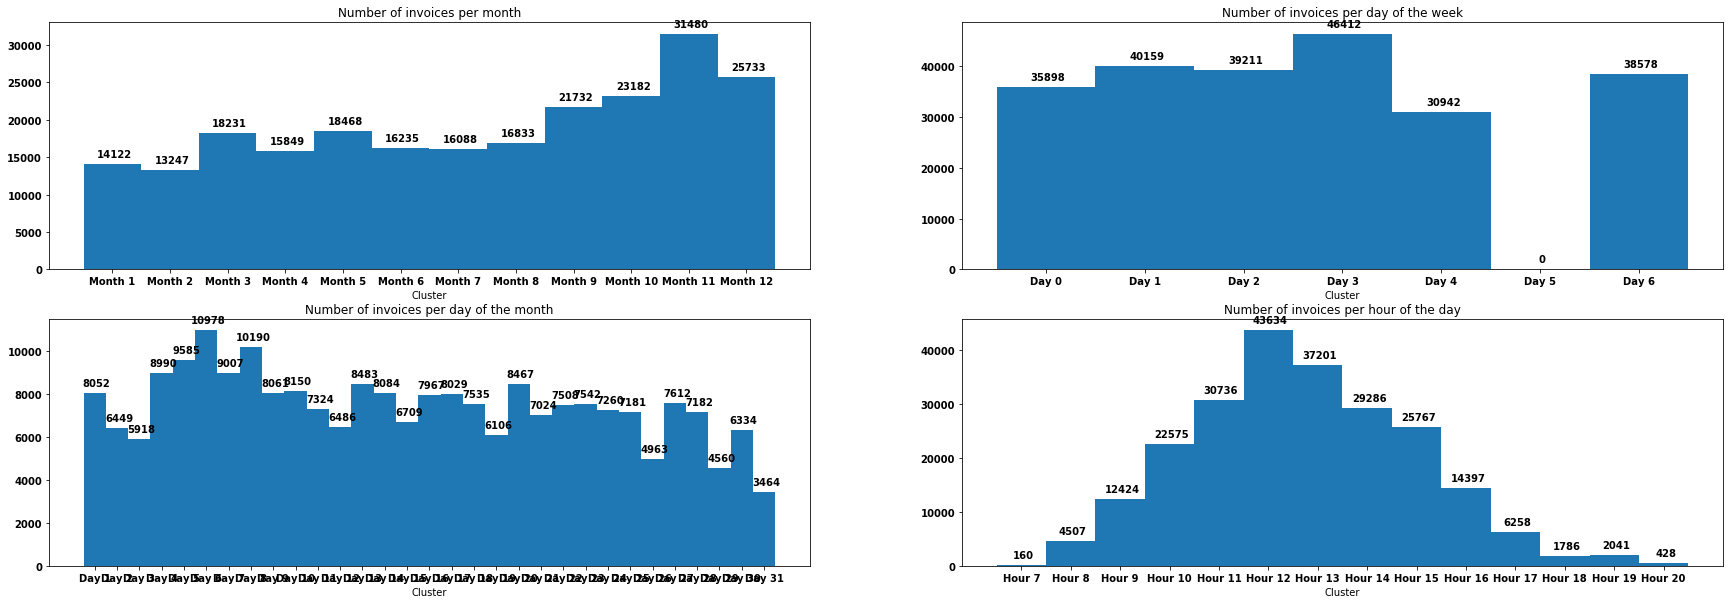

In [208]:
Cluster = int(input('Pilih Cluster'))
print('''rata rata tiap kolom :
{}'''.format(final_dataset[final_dataset['cluster']== Cluster][['min','max','mean','min_recency','frequency','monetary_value','quantity']].mean()))
print('-----------------------------------------------------')

temp_final_df = final_dataset.reset_index()

cust0 = list(temp_final_df[temp_final_df['cluster']== Cluster]['CustomerID'])

cluster0 = dfCleaned[dfCleaned['CustomerID'].isin(cust0)]
display(cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency', 'monetary_value']].mean())
print('-----------------------------------------------------')

print(''' isi data dari column :
{}'''.format(cluster0['Description'].value_counts()[:10]))
print('----------------------------------------------------')

customAggregation = {}
customAggregation["Country"] = lambda x:x.iloc[0]
customAggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(customAggregation)

print('''jumlah nilai RFM per Score :
{}'''.format(cluster0_grouped['RFMScore'].value_counts()))
print('-----------------------------------------------------')

print('''jumlah orang per negara di cluster tersebut :
{}'''.format(cluster0_grouped['Country'].value_counts()))
print('-----------------------------------------------------')

print(''' jumlah transaksi per bulan :
{}'''.format(cluster0['Month'].value_counts()))
print('-----------------------------------------------------')

plt.figure(figsize = (30,10))

plt.subplot(221)
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])
for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=( Cluster, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

plt.subplot(222)
n, bins, patches = plt.hist(cluster0['Weekday'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(Cluster, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

plt.subplot(223)
n, bins, patches = plt.hist(cluster0['Day'], bins=31)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(1,32)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=( Cluster, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

plt.subplot(224)
n, bins, patches = plt.hist(cluster0['Hour'], bins=14)
plt.xlabel("Cluster")
plt.title("Number of invoices per hour of the day")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Hour {}".format(x) for x in (sorted(cluster0['Hour'].unique()))])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=( Cluster, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)
plt.show()

##### 2.3.1.2 Cluster 0

Saya telah menganalisa semua customer cluster lainnya. Untuk cluster ini merepresentasikan jenis **almost lost customer**. Bagian aneh tentang mereka adalah beberapa bulan ketika mereka tidak berbelanja sama sekali dan itu tampak seperti pola.

**Kunci penting** :
<ul>
<li> Min Basket Price : 29.051195
<li> Max Basket Price : 47.007673
<li> Mean Basket Price : 37.902343
<li> Quantity : 9.295720
<li> UnitPrice : 2.707254
<li> QuantityCanceled : 0.098377
<li> TotalPrice : 14.057747
<li> Frequency : 3.054236
<li> Recency : 36.130947
</ul>
**RFM Score** :
<ol>
<li>344 => 199
<li>343 => 140
<li>244 => 139
<li>243 => 88
<li>222 => 65
    </ol>

##### 2.3.1.1 Cluster 1

Cluster ini penuh dengan pelanggan yang hilang. Memang, seperti yang bisa kita lihat dalam histogram bulan, hampir tidak ada faktur setelah bulan Juli. Kita dapat melihat bahwa ada pada bulan Desember tetapi bulan Desember tahun lalu. Jadi cluster ini sangat buruk untuk datazone, mereka tidak ingin memiliki pelanggan baru di sana. Selain itu mereka adalah pelanggan murah karena harga keranjang rata-rata adalah 31.53.

**Kunci penting** :
<ul>
<li> Min Basket Price : 23.479402
<li> Max Basket Price : 41.845139
<li> Mean Basket Price : 31.534987
<li> Quantity : 9.385907
<li> UnitPrice : 3.357936
<li> Quantity Canceled : 0.416778
<li> TotalPrice : 16.577076
<li> Frequency : 2.600488
<li> Recency : 238.117902
</ul>
**RFM Score** :
<ol>
<li>444 => 397</li>
<li>443 => 186</li>
<li>433 => 95</li>
<li>434 => 56</li>
<li>432 => 53</li>
</ol>
    
    
##### 2.3.1.3 Cluster 2

Cluster 7 berisi 19 pelanggan yang dianggap sebagai pelanggan terbaik karena mereka paling banyak, sangat sering (75) dan baru-baru ini. Perbedaannya dengan cluster 2 adalah mereka membeli lebih banyak pelanggan cluster 7 (75 vs 60) tetapi memiliki nilai moneter yang lebih rendah (58000 vs 249000). Mereka memiliki harga keranjang rata-rata yang lebih rendah daripada kelompok lainnya.

**Kunci penting** :
<ul>
<li> Min Basket Price : 12.282568
<li> Max Basket Price : 83.208442
<li> Mean Basket Price : 35.930377
<li> Quantity : 10.660285
<li> UnitPrice : 2.868669
<li> QuantityCanceled : 0.096942
<li> TotalPrice : 18.069833
<li> Frequency : 11.085061
<li> Recency : 25.146864           
</ul>

**RFM Score** :
<ol>
<li>111 => 368
<li>211 => 154
<li>322 => 122
<li>222 => 119
<li>122 => 99
    </ol>
    
##### 2.3.1.4 Cluster 3 belum

Saya telah menganalisa semua customer cluster lainnya. Untuk cluster ini merepresentasikan jenis **almost lost customer**. Bagian aneh tentang mereka adalah beberapa bulan ketika mereka tidak berbelanja sama sekali dan itu tampak seperti pola.

**Kunci penting** :
<ul>
<li> Min Basket Price : 297.0
<li> Max Basket Price : 38970.0
<li> Mean Basket Price : 13305.5
<li> Quantity : 10.660285
<li> UnitPrice : 2.868669
<li> QuantityCanceled : 0.096942
<li> TotalPrice : 18.069833
<li> Frequency : 11.085061
<li> Recency : 25.146864               
</ul>

**RFM Score** :
<ol>
<li>421 => 1
</ol>       

##### 2.3.1.5 Cluster 4

Yang sangat spesifik tentang klaster ini adalah tidak ada pelanggan dari Inggris, hanya negara asing (Jerman, Prancis, Belgia, Italia, dan Finlandia). Cluster ini juga heterogen dalam hal RFM karena 2 kategori yang paling terwakili adalah Pelanggan Terbaik dan Pelanggan Murah Hilang. Keranjang rata-rata sangat rendah (33) membandingkan yang di atas tetapi saya kira bahwa semakin banyak pelanggan yang kami miliki di sebuah cluster dan semakin banyak pelanggan rata-rata akan terwakili yang tidak menghabiskan $500 per transaksi seperti yang di atas.

Oktober dan november memiliki faktur terbanyak yang tidak melebihi Natal.
 


**Kunci penting** :
<ul>
<li> Min Basket Price : 25.534618
<li> Max Basket Price : 87.288339
<li> Mean Basket Price : 47.644830
<li> Quantity : 14.461265
<li> UnitPrice : 2.889170
<li> QuantityCanceled : 0.148734
<li> TotalPrice : 24.655928
<li> Frequency : 7.887146 
<li> Recency : 46.559551
</ul>

**RFM Score** :
<ol>
<li>111 => 32
<li>444 => 23
<li>211 => 22
<li>443 => 18
<li>322 => 17
</ol> 
  
##### 2.3.1.6 Cluster 5

Cluster 5 mewakili pelanggan terbaik dengan kemutakhiran tinggi yang memiliki sekitar 154 kunjungan, banyak jumlah pembelian rata-rata, nilai moneraty tinggi dan juga frekuensi tinggi sekitar 154 kunjungan. Pelanggan ini harus dijaga.

**Kunci penting** :
<ul>
<li> Min Basket Price : 9.840000
<li> Max Basket Price : 2946.870000
<li> Mean Basket Price : 395.192629
<li> Quantity : 48.939171
<li> UnitPrice : 3.161499
<li> QuantityCanceled : 0.080195
<li> TotalPrice : 103.076493
<li> Frequency : 154.213615
<li> Recency : 1.228229
</ul>

**RFM Score** :
<ol>
<li>111 => 4
</ol> 

##### 2.3.1.7 Cluster 6 belum

Saya telah menganalisa semua customer cluster lainnya. Untuk cluster ini merepresentasikan jenis **almost lost customer**. Bagian aneh tentang mereka adalah beberapa bulan ketika mereka tidak berbelanja sama sekali dan itu tampak seperti pola.

**Kunci penting** :
<ul>
<li> Min Basket Price : 13.879286
<li> Max Basket Price : 829.457143
<li> Mean Basket Price : 181.428605
<li> Quantity : 31.795784
<li> UnitPrice : 2.733310
<li> QuantityCanceled : 4.952805
<li> TotalPrice : 39.542909
<li> Frequency : 90.674972
<li> Recency : 3.266939
</ul>

**RFM Score** :
<ol>
<li>111 => 23
<li>211 => 3
<li>134 => 1
<li>444 => 1
</ol> 

##### 2.3.1.8 Cluster 7

Cluster 7 berisi 3 pelanggan yang sangat mirip. Memang, mereka hanya membeli sekali atau dua kali beberapa barang dengan jumlah besar. Mungkin beberapa profesional yang membelinya dengan diskon dan akan menjual kembali komoditas tersebut. Bahkan jika mereka memiliki nilai moneter yang tinggi, mereka tidak terlalu menarik untuk Datazon dan kita dapat menganggap mereka sebagai pelanggan yang hilang.

**Kunci penting** :
<ul>
<li> Min Basket Price : 3386.640000
<li> Max Basket Price : 3386.640000
<li> Mean Basket Price : 3386.640000
<li> Quantity : 3203.333333
<li> UnitPrice : 1.430000
<li> QuantityCanceled : 0.000000
<li> TotalPrice : 3386.640000
<li> Frequency : 1.000000
<li> Recency : 162.666667
</ul>

**RFM Score** :
<ol>
<li>441    2
<li>141    1
</ol> 


##### **3. Testing models for Prediction**

In [115]:
new_df = pd.read_csv("final_dataset_V2.csv")

In [116]:
new_df.head(5)

,CustomerID,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
0,12346,0.0,0.0,0.000000,325.0,325.0,1,0.00,74215,35,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,12347,13.2,45.0,23.308571,2.0,367.0,7,4310.00,2458,16,...,0.010970,0.0,0.0,0.009234,0.0,0.0,0.042877,0.057912,0.0,0.0
2,12348,39.6,150.0,82.840000,75.0,358.0,4,1437.24,2332,12,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.204559,0.403551,0.0,0.0
3,12349,15.0,15.0,15.000000,18.0,18.0,1,1457.55,630,18,...,0.025625,0.0,0.0,0.040465,0.0,0.0,0.027196,0.013584,0.0,0.0
4,12350,25.2,25.2,25.200000,310.0,310.0,1,294.40,196,24,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [117]:
X = new_df.drop(columns=['CustomerID', 'cluster']) 
y = new_df['cluster'].values

In [118]:
scaler = StandardScaler() # create scaler object

X_scaled = scaler.fit_transform(X)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0) # Do 80/20 split

In [120]:
X_train.shape

(3468, 144)

##### **3.1 Testing Classic Models**

##### **3.1.1 Baseline**

In [121]:
from sklearn.dummy import DummyClassifier

In [122]:
dummy_biased = DummyClassifier(random_state=0)

dummy_biased.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [123]:
print("Baseline accuracy", (dummy_biased.score(X_test, y_test))*100)

Baseline accuracy 32.98731257208766


##### **3.1.2 Linear Models**

In [124]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [125]:
# logistic regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("LogisticRegression_classifier accuracy:", (lr.score(X_test, y_test))*100)

C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression_classifier accuracy: 94.00230680507498


In [126]:
# SGD Classifier

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
print("SGDClassifier accuracy:", (SGD.score(X_test, y_test))*100)

SGDClassifier accuracy: 93.88696655132641


##### **3.1.3 SVM**

In [127]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
print("LinearSVC accuracy:", (svc.score(X_test, y_test))*100)

LinearSVC accuracy: 93.88696655132641


C:\Users\KINAN BAHUWEDA M\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### **3.2 Random Forest**

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000)

In [130]:
param_grid = { 
    'n_estimators' : [100, 500, 1000],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6],
    'criterion' :['gini', 'entropy']
}

In [131]:
rfc=RandomForestClassifier(random_state=0, n_estimators = 1000, criterion='entropy', max_depth=6, max_features='auto')

In [132]:
rfc.fit(X_train, y_train)
print("Accuracy for Random Forest Classifier:", (rfc.score(X_test, y_test)*100))

Accuracy for Random Forest Classifier: 92.96424452133795


In [133]:
y_pred = rfc.predict(X_test)

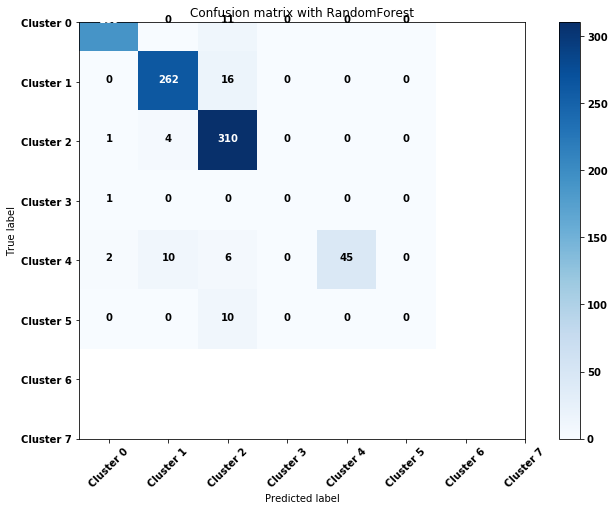

In [134]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ["Cluster {}".format(x) for x in range(8)]

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with RandomForest')

##### **3.3 XGBOOST**

In [135]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state = 0, learning_rate = 0.01, 
                                   objective = 'multi:softprob', n_estimators = 1000,
                                  colsample_bytree = 0.6, gamma = 0.5, max_depth = 7,
                                  min_child_weight = 1, subsample=0.8, n_jobs=-1, scoring='accuracy')

In [136]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.01, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='accuracy',
              seed=None, silent=None, subsample=0.8, verbosity=1)

In [137]:
print("Accuracy for XGBoost : ", (model.score(X_test, y_test))*100)

Accuracy for XGBoost :  97.92387543252595


In [138]:
with open('modelpredict.pkl','wb') as x :
    pickle.dump(model, x)

In [139]:
y_pred = model.predict(X_test)

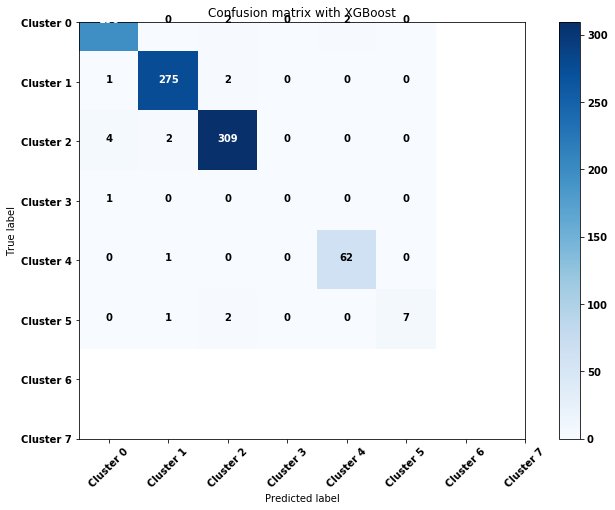

In [140]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix with XGBoost')